In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay

In [13]:
dataset=pd.read_csv(r"C:\Users\aksha\OneDrive - SSN Trust\Desktop\AKSHARA\COLLEGE\SEM 3\EDDA\LAB\lab_5\Epileptic Seizure Recognition.csv")
dataset

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [14]:
dataset=dataset.drop("Unnamed",axis=1)
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


In [15]:
dataset["y"]=np.where(dataset["y"]==1,1,0)
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [18]:
dataset.fillna(dataset.mean())
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,0


In [21]:
x=dataset.drop("y",axis=1)
y=dataset["y"]

0        0
1        1
2        0
3        0
4        0
        ..
11495    0
11496    1
11497    0
11498    0
11499    0
Name: y, Length: 11500, dtype: int32

In [22]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [23]:
pca=PCA(n_components=178)
x_pca=pca.fit_transform(x_scaled)

Text(0.5, 1.0, 'idk')

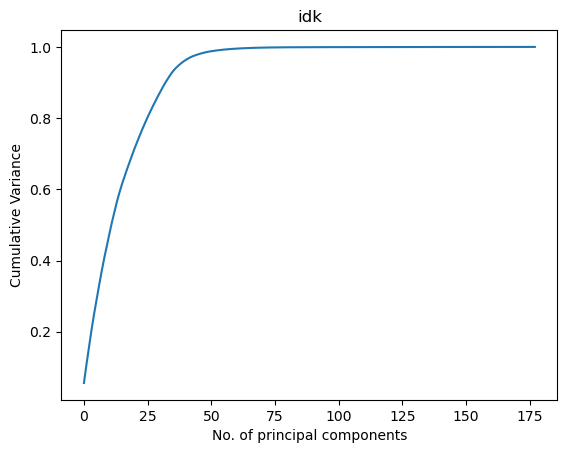

In [26]:
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance)
plt.xlabel("No. of principal components")
plt.ylabel("Cumulative Variance")
plt.title("idk")

In [35]:
f1_scores=[]
pcas=[]
for n_pcas in range(1,21):
    pca=PCA(n_components=n_pcas)
    x_pca=pca.fit_transform(x_scaled)
    x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25)
    
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    
    f1=f1_score(y_test,y_pred)
    pcas.append(n_pcas)
    f1_scores.append(f1)
    print("PCA:",n_pcas)
    print("F1 score:",f1)

PCA: 1
F1 score: 0.7547931382441978
PCA: 2
F1 score: 0.847884788478848
PCA: 3
F1 score: 0.8709677419354839
PCA: 4
F1 score: 0.8906810035842294
PCA: 5
F1 score: 0.8727615457115928
PCA: 6
F1 score: 0.8743914313534566
PCA: 7
F1 score: 0.8608608608608608
PCA: 8
F1 score: 0.8619718309859155
PCA: 9
F1 score: 0.8847583643122676
PCA: 10
F1 score: 0.8807692307692307
PCA: 11
F1 score: 0.8612167300380228
PCA: 12
F1 score: 0.8359683794466404
PCA: 13
F1 score: 0.8370672097759674
PCA: 14
F1 score: 0.87374749498998
PCA: 15
F1 score: 0.8451548451548452
PCA: 16
F1 score: 0.8554455445544554
PCA: 17
F1 score: 0.8560606060606061
PCA: 18
F1 score: 0.8509803921568627
PCA: 19
F1 score: 0.8289205702647658
PCA: 20
F1 score: 0.8125633232016211


Text(0, 0.5, 'F1 score')

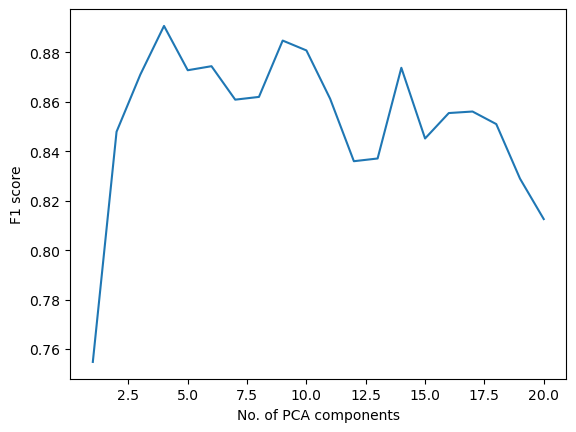

In [38]:
plt.plot(pcas,f1_scores)
plt.xlabel("No. of PCA components")
plt.ylabel("F1 score")

In [34]:
pca=PCA(n_components=5)
x_pca=pca.fit_transform(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25)

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

f1=f1_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print("F1 SCORE:",f1)
print("Accuracy:",accuracy)
print("Precision",precision)
print("Recall",recall)

F1 SCORE: 0.8906666666666667
Accuracy: 0.9572173913043478
Precision 0.9597701149425287
Recall 0.8308457711442786


Text(0.5, 1.0, 'Confusion Matrix')

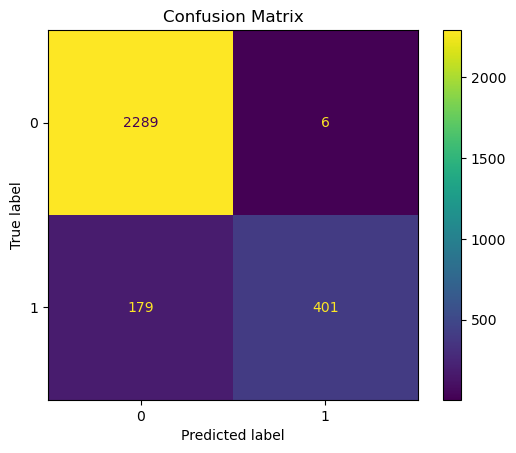

In [40]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")